# Image Calibration
In this notebook, we demonstrate how to get calibration matrix from `cv2.calibrateCamera` and undistort image via `cv2.undistort`

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 16)
import matplotlib.image as mpimg
import cv2
import numpy as np
import glob

In [7]:
"""
Args:
  cal_chessboard_dir: path of directory of chessboard images
  
Return:
  calibration parameters
"""
def calibration(cal_chessboard_dir):
    cal_chessboard_glob = glob.glob(cal_chessboard_dir+'/*.jpg')
    cal_imges = []
    for fname in cal_chessboard_glob:
        img = mpimg.imread(fname)
        cal_imges.append(img)
        
    # For mapping realistic corner.
    # we use 9x6 chessboard to calibrate camera which is supplied by Udacity
    objp = np.zeros((6*9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)
    
    objpoints = []
    imgpoints = []
    
    for img in cal_imges:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
    # Calculate calibrating-matrix for our camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return ret, mtx, dist, rvecs, tvecs

In [13]:
"""
Args:
  frame: input frame
  mtx: camera matrix
  dist: distortion coefficients
  verbose: verbose effection

Return:
  undistorted frame
"""
def undistort(frame, mtx, dist, verbose=False):
    frame_undistorted = cv2.undistort(frame, mtx, dist, newCameraMatrix=mtx)
    if verbose:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(frame)
        ax[1].imshow(frame_undistorted)
        plt.show()
    return frame_undistorted

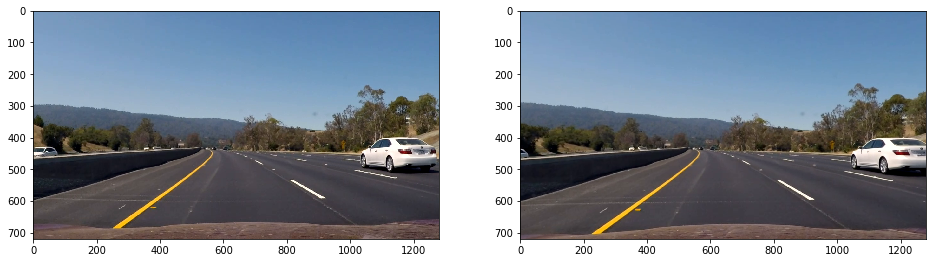

In [18]:
frame = mpimg.imread('singleshot/test.jpg')
ret, mtx, dist, rvecs, tvecs = calibration('camera_cal')
frame_undistorted = undistort(frame, mtx, dist, True)